## Animating the Evolution of the Yield Curve with Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Define the maturities for the treasury rates

In [3]:
maturities = ["3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "30y"]

Fetch treasury rates data from the Federal Reserve, drop NaN values and unnecessary columns, and rename columns

In [4]:
data = (
    obb.fixedincome.government.treasury_rates(
        start_date="1985-01-01",
        provider="federal_reserve",
    )
    .dropna(how="all")
    .drop(columns=["month_1", "year_20"])
)
data.columns = maturities

Add a column to indicate if the yield curve is inverted (30y < 3m)

In [5]:
data["inverted"] = data["30y"] < data["3m"]

Initialize figure

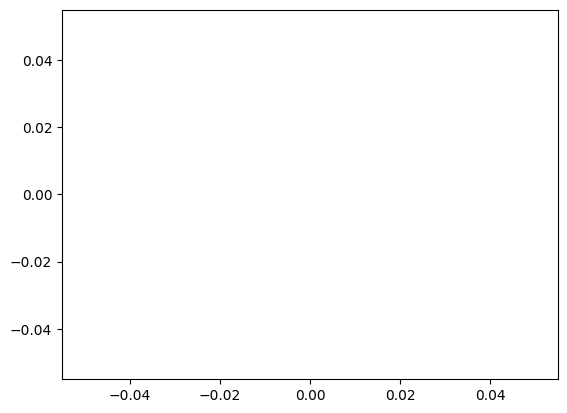

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
(line,) = ax.plot([], [])

Set the range of ticks

In [7]:
ax.set_xlim(0, 8)  # Adjusted the range to accommodate all columns
ax.set_ylim(0, 20)

(0.0, 20.0)

Set the tick locations

In [8]:
ax.set_xticks(range(9))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

Set the axis labels

In [9]:
ax.set_xticklabels(maturities)
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(0, 2, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10'),
 Text(0, 12, '12'),
 Text(0, 14, '14'),
 Text(0, 16, '16'),
 Text(0, 18, '18')]

Force the y-axis labels to the left

In [10]:
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

Add the axis labels

Text(0.5, 1.0, 'U.S. Treasury Bond Yield Curve')

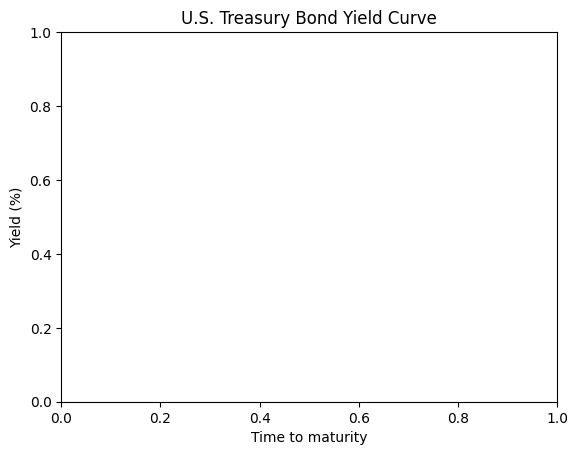

In [11]:
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturity")
plt.title("U.S. Treasury Bond Yield Curve")

Initialization function for the animation

In [12]:
def init_func():
    line.set_data([], [])
    return (line,)

Animation function to update the plot for each frame

In [13]:
def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")

    if data.inverted.iloc[i]:
        line.set_color("r")
    else:
        line.set_color("y")

    line.set_data(x, y)

    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return (line,)

Create the animation

In [14]:
ani = animation.FuncAnimation(
    fig, animate, init_func=init_func, frames=len(data.index), interval=250, blit=True
)

Display the plot

In [15]:
plt.show()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.